In [1]:
%matplotlib inline

import numpy as np
import collections
from collections import OrderedDict, Counter, defaultdict
import pandas as pd

import Bio
from Bio import SeqIO

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show 
import matplotlib.patches as patches    
from matplotlib import colors


import glob

import subprocess
from subprocess import call

import re

import pickle

from Bio.SubsMat import MatrixInfo
import Bio.Data.CodonTable

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

/home/alla/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# open metadata with scores and metrics
meta = pd.read_csv('tmp_res/METADATA_CURRENT.txt', sep='\t')

# gencode 25
metadata_pc_g25 = pd.read_csv('tmp_res/metadata_pc_g25.txt', sep='\t')

## Prepare transcriptomic coordinates of codons (theoretical extension + 1st 50 codons of CDS) 

### PhyloSET

In [3]:
primary_set = pd.read_csv('tmp_res/SET1.txt', sep='\t')

li = []

for el in primary_set[['tr_id', 'N_term_start1', 'N_term_end1']].to_numpy():
    tr = el[0]
    start = el[1]
    end = el[2] + 50*3 # add 50 codons of CDS
    
    start_li = list(range(start, end, 3))
    end_li = list(range(start+3, end+3, 3))
    
    for i,xy in enumerate(zip(start_li, end_li)):
        li.append([tr, i, xy[0], xy[1]])
        
df = pd.DataFrame(li, columns = ['tr_id', 'codon_number', 'codon_start', 'codon_end'])
df.to_csv('tmp_res/local_coo_of_codons_for_PCSF_plot_PhyloSET_plus50codonsCDS.txt', sep='\t', index=False)
df['group'] = list(range(1, df.shape[0]+1))
df[0:4]

,tr_id,codon_number,codon_start,codon_end,group
0,ENST00000377898.3,0,2,5,1
1,ENST00000377898.3,1,5,8,2
2,ENST00000377898.3,2,8,11,3
3,ENST00000377898.3,3,11,14,4


### RiboSET

In [4]:
secondary_SET = pd.read_csv('tmp_res/SET2.txt', sep='\t')

li = []

for el in secondary_SET[['tr_id', 'N_term_start1', 'N_term_end1']].to_numpy():
    tr = el[0]
    start = el[1]
    end = el[2] + 50*3 # add 50 codons of CDS
    
    start_li = list(range(start, end, 3))
    end_li = list(range(start+3, end+3, 3))
    
    for i,xy in enumerate(zip(start_li, end_li)):
        li.append([tr, i, xy[0], xy[1]])
        
df = pd.DataFrame(li, columns = ['tr_id', 'codon_number', 'codon_start', 'codon_end'])
df.to_csv('tmp_res/local_coo_of_codons_for_PCSF_plot_RiboSET_plus50codonsCDS.txt', sep='\t', index=False)
df['group'] = list(range(1, df.shape[0]+1))
df[0:4]

,tr_id,codon_number,codon_start,codon_end,group
0,ENST00000379389.4,0,1,4,1
1,ENST00000379389.4,1,4,7,2
2,ENST00000379389.4,2,7,10,3
3,ENST00000379389.4,3,10,13,4


# Get global coordinates of codons (R-script, 1a notebook), then upload it to server in order to calculate PCSF score and extract alignments 

### PhyloSET

In [5]:
out = pd.read_csv('tmp_res/global_coo_of_codons_for_PCSF_plot_PhyloSET_plus50codonsCDS.txt', sep='\t')

out2 = out[out['hit'] == True].merge(df, on=['group'], how='inner')
out3 = out2[['group', 'group_name', 'seqnames', 'start', 'end', 'strand', 'exon_rank']]
out3['global_coo'] = out3['seqnames']+':'+out3['start'].astype(str)+'-'+out3['end'].astype(str)
out4 = out3[['group_name', 'group', 'strand', 'global_coo']].groupby(['group_name', 'group', 'strand']).agg('+'.join).reset_index()
out4['file_name'] = out4['group_name'] +'_'+out4['group'].astype(str)
out4.columns = ['tr_id', 'codon_number', 'strand', 'global_coo', 'file_name']

out4.to_csv('tmp_res/global_coo_of_codons_for_PCSF_plot_PhyloSET_plus50codonsCDS_to_server.txt', sep='\t', index=False)

/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### RiboSET

In [6]:
out = pd.read_csv('tmp_res/global_coo_of_codons_for_PCSF_plot_RiboSET_plus50codonsCDS.txt', sep='\t')
out2 = out[out['hit'] == True].merge(df, on=['group'], how='inner')
out3 = out2[['group', 'group_name', 'seqnames', 'start', 'end', 'strand', 'exon_rank']]
out3['global_coo'] = out3['seqnames']+':'+out3['start'].astype(str)+'-'+out3['end'].astype(str)
out4 = out3[['group_name', 'group', 'strand', 'global_coo']].groupby(['group_name', 'group', 'strand']).agg('+'.join).reset_index()
out4['file_name'] = out4['group_name'] +'_'+out4['group'].astype(str)
out4.columns = ['tr_id', 'codon_number', 'strand', 'global_coo', 'file_name']

out4.to_csv('tmp_res/global_coo_of_codons_for_PCSF_plot_RiboSET_plus50codonsCDS_to_server.txt', sep='\t', index=False)

/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Load PhyloCSF scores per codon 

In [7]:
import os

li = []

path = 'data/PhyloSET_PCSF_per_codon/*/*.txt' # PhyloSET
path2 = 'data/PhyloSET_PCSF_per_codon/*/*.txt' # RiboSET

for file in glob.glob(path):
    try:
        tmp = pd.read_csv(file, sep='\t', header=None)
        tmp['tr_id_codon'] = [x.split('/')[-1].split('.fasta')[0] for x in tmp[0].tolist()]
        tmp['tr_id'] = [x.split('/')[-1].split('.fasta')[0].split('_')[0] for x in tmp[0].tolist()]
        tmp['codon'] = [x.split('/')[-1].split('.fasta')[0].split('_')[1] for x in tmp[0].tolist()]
        tmp2 = tmp[['tr_id_codon', 'tr_id', 'codon', 2]]
        tmp2.columns = ['tr_id_codon', 'tr_id', 'codon', 'score']
        li.append(tmp2)
    except Exception as e:
        print (file, e)
        
for file in glob.glob(path2):
    try:
        tmp = pd.read_csv(file, sep='\t', header=None)
        tmp['tr_id_codon'] = [x.split('/')[-1].split('.fasta')[0] for x in tmp[0].tolist()]
        tmp['tr_id'] = [x.split('/')[-1].split('.fasta')[0].split('_')[0] for x in tmp[0].tolist()]
        tmp['codon'] = [x.split('/')[-1].split('.fasta')[0].split('_')[-1] for x in tmp[0].tolist()]
        tmp2 = tmp[['tr_id_codon', 'tr_id', 'codon', 2]]
        tmp2.columns = ['tr_id_codon', 'tr_id', 'codon', 'score']
        li.append(tmp2)
    except Exception as e:
        print (file, e)
        
RES = pd.concat(li)
RES = RES.merge(meta[['tr_id', 'gene', 'N_term_start1', 'N_term_end1', 'len_codons']]).merge(metadata_pc_g25[['tr_id', 'transcript_seq']])
RES['codon'] = RES['codon'].astype(int)
RES['score'] = RES['score'].astype(float)
print (RES.shape)
res = dict(tuple(RES.groupby('tr_id')))

data/PhyloSET_PCSF_per_codon/chr9/PhyloCSF_out.txt list index out of range
data/PhyloSET_PCSF_per_codon/chr21/PhyloCSF_out.txt list index out of range
data/PhyloSET_PCSF_per_codon/chrY/PhyloCSF_out.txt list index out of range
(17552, 9)


# We also will need .fasta file with alignment for gene of interest (NTE+50codons), which can be get from CodAlignView

# Create files with RiboSET count (downloaded from the server)

In [8]:
# get total list of transcripts 

amb_path = 'data/counts_ext/download/N_term_amb/*'
unamb_path = 'data/counts_ext/download/N_term_unamb/*'

list_of_tr = list(set([tr_path.split('/')[-1].split('_counts')[0] for tr_path in glob.glob(unamb_path)+glob.glob(amb_path)]))

list_of_amb_tr = [tr_path.split('/')[-1].split('_counts')[0] for tr_path in glob.glob(amb_path)]

list_of_unamb_tr = [tr_path.split('/')[-1].split('_counts')[0] for tr_path in glob.glob(unamb_path)]

print (list_of_tr[0:3])

print (len(list_of_tr), len(list_of_amb_tr), len(list_of_unamb_tr))

['ENST00000586301', 'ENST00000373632', 'ENST00000389501']
76910 75232 75139


### We are going to process Read-counts only for genes in RiboSet: 

In [9]:
out_counts = {'amb':{}, 'unamb':{}, 'all':{}}

for i, tr_id in enumerate(list_of_tr):
    if tr_id in [x.split('.')[0] for x in secondary_SET.tr_id.tolist()]:
        
        # end of transcript = its length
        tr_length = len(metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq)
        tr_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq
        gene = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].gene
    
        
        if tr_id in list_of_amb_tr:
            tr_path_amb = 'data/counts_ext/download/N_term_amb/%s_counts.txt' % tr_id
            df_amb = pd.read_csv(tr_path_amb, sep='\t')
            d_amb = dict(zip(df_amb['pos'].tolist(), df_amb['Total'].tolist()))
            
            # add missing positions 
            for i in range(0, tr_length):
                if i not in d_amb:
                    d_amb[i] = 0
            
            
            out_counts['amb'][tr_id] = d_amb 
            
        else: # if tr_id is not in amb list
            print ('%s is not in amb list' % tr_id)
            
            
        if tr_id in list_of_unamb_tr:    
            
            tr_path_unamb = 'data/counts_ext/download/N_term_unamb/%s_counts.txt' % tr_id
            df_unamb = pd.read_csv(tr_path_unamb, sep='\t')
            d_unamb = dict(zip(df_unamb['pos'].tolist(), df_unamb['Total'].tolist()))
            
            for i in range(0, tr_length):
                if i not in d_unamb:
                    d_unamb[i] = 0
                
            out_counts['unamb'][tr_id] = d_unamb 
        
        else: # if tr_id is not in amb list
            print ('%s is not in unamb list' % tr_id)
            
            

### combine amb and unamb reads

In [10]:
for tr_id in [x.split('.')[0] for x in secondary_SET.tr_id.tolist()]:
    
    tr_length = len(metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq)
    out_counts['all'][tr_id] = {}
    
    #print (tr_id)
    
    if (tr_id in out_counts['amb']) & (tr_id in out_counts['unamb']):
        
        for pos in range(0, tr_length): 
            out_counts['all'][tr_id][pos] = out_counts['amb'][tr_id][pos] + out_counts['unamb'][tr_id][pos]
            
    elif (tr_id in out_counts['amb']) & (tr_id not in out_counts['unamb']):
        # sum only amb
        for pos in range(1, tr_length+1): 
            out_counts['all'][tr_id][pos] = out_counts['amb'][tr_id][pos] 
            
    elif (tr_id not in out_counts['amb']) & (tr_id in out_counts['unamb']):
        # sum only unamb
        for pos in range(1, tr_length+1): 
            out_counts['all'][tr_id][pos] = out_counts['unamb'][tr_id][pos] 
            
    else:
        print ('smth strange %s' % tr_id)

### Frame-counts for all reads: ambugous + unambigous

In [11]:
out_df_frames = {}

for tr_id in out_counts['all']:
    d = out_counts['all'][tr_id]
    # d = dict with positioons and counts 
    frames = {'Frame_1': {}, 'Frame_2': {}, 'Frame_3': {} }
    for pos, counts in d.items():
        if pos % 3 == 2:
            frames['Frame_1'][pos] = counts
        elif pos % 3 == 0:
            frames['Frame_2'][pos] = counts
        else:
            frames['Frame_3'][pos] = counts
    # make df 
    li1 = []
    li2 = []
    li3 = []
    
    # end of transcript = its length
    tr_length = len(metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq)
    tr_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq
    gene = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].gene
    
    for i in range(0, tr_length):
        if i in frames['Frame_1']:
            li1.append([i, int(frames['Frame_1'][i])])
        else:
            li1.append([i, int(0)])
    
    df1 = pd.DataFrame(li1, columns = ['Position', 'Frame 1']).sort_values(by='Position')
    
    for i in range(0, tr_length):
        if i in frames['Frame_2']:
            li2.append([i, int(frames['Frame_2'][i])])
        else:
            li2.append([i, int(0)])
    
    df2 = pd.DataFrame(li2, columns = ['Position', 'Frame 2']).sort_values(by='Position')
    
    for i in range(0, tr_length):
        if i in frames['Frame_3']:
            li3.append([i, int(frames['Frame_3'][i])])
        else:
            li3.append([i, int(0)])
    
    df3 = pd.DataFrame(li3, columns = ['Position', 'Frame 3']).sort_values(by='Position')
    
    df_f = df1.merge(df2, on='Position', how='inner').merge(df3, on='Position', how='inner')
    
    df_f['Sequence'] = list(tr_seq)
    
    df_f['Position'] = df_f['Position']-3
    
    df_f['rna_seq'] = None
    
    df_f[['Position', 'Sequence', 'Frame 1', 'Frame 2', 'Frame 3', 'rna_seq']].to_csv('data/TRIPSlike_plots_data_RiboSET/%s_%s.csv' % (gene, tr_id), index=False)

            
    out_df_frames[tr_id] = df_f

### Frame counts only for unamb

In [12]:
out_df_frames_un = {}

for i, tr_id in enumerate(out_counts['unamb']):
    
    if i % 100 == 0:
        print (i)
        
    d = out_counts['unamb'][tr_id]
    # d = dict with positioons and counts 
    frames = {'Frame_1': {}, 'Frame_2': {}, 'Frame_3': {} }
    for pos, counts in d.items():
        if pos % 3 == 2:
            frames['Frame_1'][pos] = counts
        elif pos % 3 == 0:
            frames['Frame_2'][pos] = counts
        else:
            frames['Frame_3'][pos] = counts
    # make df 
    li1 = []
    li2 = []
    li3 = []
    
    # end of transcript = its length
    tr_length = len(metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq)
    tr_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq
    gene = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].gene
    
    for i in range(1, tr_length+1):
        if i in frames['Frame_1']:
            li1.append([i, int(frames['Frame_1'][i])])
        else:
            li1.append([i, int(0)])
    
    df1 = pd.DataFrame(li1, columns = ['Position', 'Frame 1']).sort_values(by='Position')
    
    for i in range(1, tr_length+1):
        if i in frames['Frame_2']:
            li2.append([i, int(frames['Frame_2'][i])])
        else:
            li2.append([i, int(0)])
    
    df2 = pd.DataFrame(li2, columns = ['Position', 'Frame 2']).sort_values(by='Position')
    
    for i in range(1, tr_length+1):
        if i in frames['Frame_3']:
            li3.append([i, int(frames['Frame_3'][i])])
        else:
            li3.append([i, int(0)])
    
    df3 = pd.DataFrame(li3, columns = ['Position', 'Frame 3']).sort_values(by='Position')
    
    df_f = df1.merge(df2, on='Position', how='inner').merge(df3, on='Position', how='inner')
    
    df_f['Sequence'] = list(tr_seq)
    
    df_f['Position'] = df_f['Position'] -1 #-3
    
    df_f['rna_seq'] = None
    
    df_f[['Position', 'Sequence', 'Frame 1', 'Frame 2', 'Frame 3', 'rna_seq']].to_csv('data/TRIPSlike_plots_data_RiboSET/%s_%s_unamb.csv' % (gene, tr_id), index=False)

            
    out_df_frames_un[tr_id] = df_f

0
100
200
300


In [13]:
# save it out_df_frames_un 

with open('data/out_df_frames_un_dict.pickle', 'wb') as handle:
    pickle.dump(out_df_frames_un, handle, protocol=pickle.HIGHEST_PROTOCOL)

# PLOT FUNCTIONS 

### PCSF per codon 

In [14]:
def prepare_labels(tr_id, RES, primary_set, CDS):
    '''
    prepare labels as list of codons 
    '''  
    N_term_start1 = primary_set[primary_set['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1
    
    if CDS == True:
        N_term_stop1 = primary_set[primary_set['tr_id'].str.contains(tr_id)].iloc[0].N_term_end1 + 50*3 #add CDS 50 codons
    else:
        N_term_stop1 = primary_set[primary_set['tr_id'].str.contains(tr_id)].iloc[0].N_term_end1

    l = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq[N_term_start1:N_term_stop1]
    li = []
    for x in zip([l[i:i+3] for i in range(0, len(l), 3)], list(range(N_term_start1, N_term_stop1, 3))):
        li.append(x[0]+'_'+str(x[1]))

    return (li)
                    
lab_test = prepare_labels(tr_id='ENST00000307522.3', RES=RES, primary_set=primary_set, CDS=False)
lab_test[-5:]

['GAC_759', 'TCC_762', 'ACG_765', 'GTG_768', 'GGG_771']

In [15]:
def prepare_data_for_PCSF_line_plot(tr_id, primary_set, RES, res, CDS):
    '''
    primary set - master df containing tons of metadat info such as tr_id,gene,
    N_term_start1,N_term_end1,len_codons,etc
    
    tr_id = transcript id
    
    RES = df containing tr_id_codon,tr_id,codon,score,gene,N_term_start1,N_term_end1,len_codons..
    '''
    
    codon_start = int(RES[RES['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1)
    
    if CDS == True:
        codon_stop = int(RES[RES['tr_id'].str.contains(tr_id)].iloc[-1].N_term_end1) + 50*3 # we add 50 codons of CDS
        len_codons = int(RES[RES['tr_id'].str.contains(tr_id)].iloc[0].len_codons) + 50 
    else:
        codon_stop = int(RES[RES['tr_id'].str.contains(tr_id)].iloc[-1].N_term_end1) 
        len_codons = int(RES[RES['tr_id'].str.contains(tr_id)].iloc[0].len_codons)
        
    ext_seq = RES[RES['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq[codon_start:codon_stop]
    ext_seq_codons = [ext_seq[i:i+3] for i in range(0, len(ext_seq), 3)]
    
    # positions of different start codons
    CTG = list(np.where(np.array(ext_seq_codons) == 'CTG')[0]) # green
    ATG = list(np.where(np.array(ext_seq_codons) == 'ATG')[0]) # cyan
    GTG = list(np.where(np.array(ext_seq_codons) == 'GTG')[0]) # cyan
    TTG = list(np.where(np.array(ext_seq_codons) == 'TTG')[0]) # cyan
    ATA = list(np.where(np.array(ext_seq_codons) == 'ATA')[0]) # black
    ATT = list(np.where(np.array(ext_seq_codons) == 'ATT')[0]) # black
    ACG = list(np.where(np.array(ext_seq_codons) == 'ACG')[0]) # black 
    ATC = list(np.where(np.array(ext_seq_codons) == 'ATC')[0]) # black
    AAG = list(np.where(np.array(ext_seq_codons) == 'AAG')[0]) # black 
    AGG = list(np.where(np.array(ext_seq_codons) == 'AGG')[0]) # black
    XTG_pos = CTG + GTG + TTG
    rest = ATA + ATT + ACG + ATC + AAG + AGG
    
    # labels: codon + position 
    labels = prepare_labels(tr_id=tr_id, RES=RES, primary_set=primary_set, CDS=CDS)
    
    d = {'labels':labels, 
        'codon_start': codon_start, 
        'codon_stop': codon_stop, 
         'len_codons': len_codons, 
         'ext_seq': ext_seq, 
         'ext_seq_codons': ext_seq_codons,
         'res': res, 
          'RES':RES,
         'XTG_pos':XTG_pos,
        'ATG': ATG, 
        'rest':rest, 
        'tr_id':tr_id}
         
         
    return d

### Alignment Plot

In [16]:
codon_dict = Bio.Data.CodonTable.standard_dna_table.forward_table # {'TTT': 'F','TTC': 'F', 'TTA': 'L'
blosum62_dict = MatrixInfo.blosum62  # ('Z', 'Y'): -2,

def output_matrix_for_plotting(fasta_input):
    # open fasta, save triplets 
    aln = []
    with open(fasta_input, 'r') as input_handle:
        for record in SeqIO.parse(input_handle, "fasta"):
            seq = str(record.seq)
            aln.append([seq[i:i+3] for i in range(0, len(seq), 3)]) 
            
    # transform triplets into aa
    aa_matrix = []

    for pos in range(0, len(aln[0])): # len(aln[0]) = number of triplets 
        
        aa_col = []
        triplet_column = [x[pos] for x in aln]
        
        ref_codon = triplet_column[0]
    
        for codon in triplet_column: 
            # codon -> aa 
            if (codon.find('-') != -1):
                aa = '-'
                codon_ = '-'
            elif (codon.find('.') != -1):
                aa = '.'
                codon_ = '.'
            elif (codon.find('N') != -1):
                aa = 'N'
                codon_ = 'N'
            elif (codon == 'TAG') | (codon == 'TGA') | (codon == 'TAA'):
                aa = 'STOP'
                codon_ = 'STOP'
            else:
                aa = codon_dict[codon]
                codon_ = codon
        
            aa_col.append('%s_%s' % (aa, codon_))
        aa_matrix.append(aa_col)
        
    aa_matrix = np.array(aa_matrix).T
            
    # color and number matrices
    final_out = []
    final_out_v = []

    for pos in range(0, len(aa_matrix[0])): # len(aln[0]) = number of triplets 
        final_col = []
        final_col_v = []

        aa_column = [x[pos] for x in aa_matrix]
        ref_aa = aa_column[0].split('_')[0]
        ref_codon = aa_column[0].split('_')[1]
    
        if ref_codon == 'ATG':
            final_col.append('blue')
            final_col_v.append(20)
        else:
            final_col.append('white')
            final_col_v.append(1)

        for aa in aa_column[1:]:
            aa_letter = aa.split('_')[0]
            codon = aa.split('_')[1]
        
        
            if aa_letter == 'ATG':
                print (aa_letter, codon, pos)
        
            # compare aa and compare codons
        
            if codon == ref_codon:    # white=1, darkgreen=5, grey=10, purple=15, blue=20, lightgreen=25, red=30
                if codon == 'ATG':
                    color = 'blue'
                    number = 20
                else:
                    color = 'white'
                    number = 1
            
            elif codon != ref_codon:
                if aa_letter == ref_aa: # conservative
                    color = 'darkgreen'
                    number = 5
                else: 
                    if (aa_letter == '-') | (aa_letter == '.') | (aa_letter == 'N'):
                        color = 'grey'
                        number = 10
                    elif (aa_letter == 'STOP'):
                        color = 'purple'
                        number = 15
                    elif (codon == 'ATG'):
                        color = 'blue'
                        number = 20
                    else:
                        try:
                            score = blosum62_dict[(ref_aa, aa_letter)]
                        except:
                            score = blosum62_dict[(aa_letter, ref_aa)]
                        if score > 0: # synonimous 
                            color = 'lightgreen'
                            number = 25
                        else:
                            color = 'red' # radical
                            number = 30
   
            final_col.append(color)
            final_col_v.append(number)

        final_out.append(final_col)
        final_out_v.append(final_col_v)
    
    final_out = np.array(final_out).T
    final_out_v = np.array(final_out_v).T
    
    return (final_out_v[::-1])

In [25]:
def plot_PCSF_score_and_aln_trips(d, d1, matrix, figsize=(22, 5), X=45, Y=55, add_point=False):
    
    tr_id = d['tr_id']
    fig, ax = plt.subplots(3, 1, figsize=figsize, sharex = True,
                           gridspec_kw={'height_ratios': [10, 5, 1], 
                                       'wspace':0.05, 'hspace':0.05}) 
    
    aln_ax = ax[0]
    line_plot_ax = ax[1]
    codon_ax = ax[2]
    #trips_ax = ax[3]
    
    cmap = colors.ListedColormap(['white', 'limegreen', 'grey', 'purple', 'deepskyblue', 'springgreen', 'red'])
    bounds=[0,  1, 5, 10, 15, 20, 25, 30, 35]
    norm = colors.BoundaryNorm(bounds, cmap.N) 
    aln_ax.imshow(matrix, interpolation='nearest', origin='lower',cmap=cmap, norm=norm, aspect='auto')
    aln_ax.set_xticks(range(0, d['len_codons']))
    aln_ax.set_xlim(0, d['len_codons'])
    aln_ax.set_yticklabels(())
    
    line_plot_ax.plot(list(range(0, len(d['res'][tr_id]['codon'].tolist()))), 
               d['res'][tr_id]['score'].tolist(), 
               c = 'grey', 
               linewidth=7)
    line_plot_ax.set_xlim(0, d['len_codons'])
    line_plot_ax.axhline(y=0, color='r', linestyle='-', linewidth=7)
    #line_plot_ax.set_ylabel('PhyloCSF_score', fontsize=X)
    #line_plot_ax.set_xlabel('Codon number', fontsize=X)

    line_plot_ax.tick_params(axis='y', labelsize=45)
    #line_plot_ax.set_title(d['RES'][d['RES']['tr_id'] == tr_id].iloc[0].gene+'_'+tr_id, fontdict={'fontsize': X})
    line_plot_ax.set_xticks(range(0, d['len_codons']))
    line_plot_ax.set_yticklabels(())
    line_plot_ax.set_xlim(0, d['len_codons'])
    
    #if add_point is not False:
            # add point position: right from the start of primary extension 
            # we have to add it manually 
            # it's a position of codon starting from the start of primary extension 
            #x1 = add_point
            #y1 = res[tr_id]['score'].tolist()[x1]
            #line_plot_ax.scatter(x1, y1, s=1800, c='blue', marker='o', label='Ribo-seq')

    for codon_pos in d['XTG_pos']:
        codon_ax.axvline(x=codon_pos, c='violet', linewidth=7)
        
    for codon_pos in d['ATG']:
        codon_ax.axvline(x=codon_pos, c='dodgerblue', linewidth=7)
        
    for codon_pos in d['rest']:
        codon_ax.axvline(x=codon_pos, c='darkred', linewidth=7)
        
    codon_ax.xaxis.label.set_visible(False)
    codon_ax.yaxis.label.set_visible(False)
    codon_ax.set_yticklabels([])
    codon_ax.set_facecolor('whitesmoke')
    
    
    codon_ax.set_xticks(list(range(0, d['len_codons'])))
    codon_ax.set_xticklabels(labels=d['labels'], fontdict={'fontsize': Y})
    
    for tick in codon_ax.get_xticklabels():
        tick.set_rotation(90)
        
    # # # # # # # TRIPS # # # # # # #
    
    
    

    # # # # # # # TRIPS # # # # # # # #
        
    # align axis 
    pos = aln_ax.get_position()
    pos2 = line_plot_ax.get_position()
    line_plot_ax.set_position([pos.x0, pos2.y0, pos.width, pos2.height])

    pos3 = line_plot_ax.get_position()
    pos4 = codon_ax.get_position()
    codon_ax.set_position([pos3.x0, pos4.y0, pos3.width, pos4.height])
    
    #pos5 = codon_ax.get_position()
    #pos6 = trips_ax.get_position()
    #trip
    #s_ax.set_position([pos5.x0, pos6.y0, pos5.width, pos6.height])
    
    plt.show()

### Trips-viz-like plot 

In [26]:
def prepare_data_for_trips2(meta, file_counts, metadata_pc_g25, 
                           tr_id, gene, l, p, fraq, cds, 
                           predicted_ext_start=False, figsize=(20, 10),
                           xlims='full', zeros=True, name='test.png', linew=9):
    
    f = pd.read_csv(file_counts)
    f.columns = ['Position', 'Sequence', 'Frame1', 'Frame2', 'Frame3', 'RNASeq']
    
    atgs_pos = {'frame_0':[], 'frame_1':[], 'frame_2':[]}
    stop_pos = {'frame_0':[], 'frame_1':[], 'frame_2':[]}

    for pos in f.Position.tolist():
        codon = ''.join(f.Sequence.tolist()[(pos-1):(pos-1+3)])
        if codon == 'ATG':
            if pos % 3 == 0:
                atgs_pos['frame_0'].append(pos)
            elif pos % 3 == 1:
                atgs_pos['frame_1'].append(pos)
            else:
                atgs_pos['frame_2'].append(pos)
            
        elif (codon == 'TGA') | (codon == 'TAA') | (codon == 'TAG'):
            if pos % 3 == 0:
                stop_pos['frame_0'].append(pos)
            elif pos % 3 == 1:
                stop_pos['frame_1'].append(pos)
            else:
                stop_pos['frame_2'].append(pos)
        else:
            continue     
            
    # add CDS borders
    cds_stop_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_stop_pos
    cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos + 1
    cds_start_codon = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_codon
    
    if xlims == 'ext':
        xlim1 = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1
        xlim2 = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].N_term_end1 + 50*3
    elif len(xlims) == 2:
        xlim1 = xlims[0]
        xlim2 = xlims[1]
    else: # full transcript
        xlim1 = 0
        xlim2 = len(metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq)
    
    d = {}
    
    d['cds_stop_pos'] = cds_stop_pos
    d['cds_start_pos'] = cds_start_pos
    d['cds_start_codon'] = cds_start_codon
    d['f'] = f
    d['stop_pos'] = stop_pos
    d['atgs_pos'] = atgs_pos
    d['xlims'] = (xlim1, xlim2)
    d['predicted_ext_start'] = predicted_ext_start
    d['l'] = l
    d['p'] = p
    d['figsize'] = figsize
    d['fraq'] = fraq
    d['cds'] = cds
    d['name'] = tr_id+'_'+gene
    d['zeros'] = zeros
    d['linew'] = linew
    
    return d


def trips_full2(d, name='test', font1=38, font2=45):
    
    l = d['l']
    p = d['p']
    f = d['f'] # dict with frames 
    atgs_pos = d['atgs_pos']
    stop_pos = d['stop_pos']
    cds_start_pos = d['cds_start_pos']
    cds_stop_pos = d['cds_stop_pos']
    figsize = d['figsize']
    xlims = d['xlims']
    fraq = d['fraq']
    cds = d['cds']
    name = d['name']
    zeros = d['zeros']
    linewidth = d['linew'] 
    
    fig, axes = plt.subplots(5, 1, figsize = figsize, 
                             gridspec_kw={'height_ratios':[10,1.5,1,1,1]}, sharex=True, sharey=False, )

    main_plot = axes[0]
    #cds = axes[1]
    orfs = axes[1]
    red = axes[2]
    green = axes[3]
    blue = axes[4]

    # x 
    main_plot.set_xlim(f.Position.min(), f.Position.max()+1)

    # y
    
    if xlims is not False:
        f1 = f[xlims[0]:xlims[1]]
        max_height = np.max([np.max(f1.Frame1.tolist()), np.max(f1.Frame2.tolist()), np.max(f1.Frame3.tolist())])
        print (max_height)
    else:
        max_height = np.max([np.max(f.Frame1.tolist()), np.max(f.Frame2.tolist()), np.max(f.Frame3.tolist())])
        print (max_height)
        
    #### ????? why they dissappear????? ######    
    main_plot.set_ylim(0, max_height+max_height/l)
    main_plot.set_yticks(np.arange(0, max_height+max_height/l, p))
    main_plot.set_yticklabels(np.arange(0, max_height+max_height/l, p, dtype=np.int64), fontsize=font1)
    
    # print (f[125:150])

    # #frame 1 = red, frame2 = green, frame3 = blue
    if zeros == True:
        main_plot.plot(f.Frame1.tolist(), color = 'coral', linewidth=linewidth, linestyle='-')
        main_plot.plot(f.Frame2.tolist(), color = 'mediumseagreen', linewidth=linewidth, linestyle='-')
        main_plot.plot(f.Frame3.tolist(), color = 'cornflowerblue', linewidth=linewidth, linestyle='-')
    
    else:
        # delete zeros 
        t = f[['Position', 'Frame1']]
        fr1 = t[t['Frame1'] != 0]
        
        t = f[['Position', 'Frame2']]
        fr2 = t[t['Frame2'] != 0]
        
        t = f[['Position', 'Frame3']]
        fr3 = t[t['Frame3'] != 0]
        
        main_plot.plot(fr1.Position.tolist(), fr1.Frame1.tolist(), color = 'coral', linewidth=linewidth, linestyle='-')
        main_plot.plot(fr2.Position.tolist(), fr2.Frame2.tolist(), color = 'mediumseagreen', linewidth=linewidth, linestyle='-')
        main_plot.plot(fr3.Position.tolist(), fr3.Frame3.tolist(), color = 'cornflowerblue', linewidth=linewidth, linestyle='-')
    
        
        
        
    red.set_facecolor('coral')
    green.set_facecolor('mediumseagreen')
    blue.set_facecolor('cornflowerblue')
    #cds.set_facecolor('lightgrey')

    #blue.set_xticks(np.arange(0, f.Position.max(), 50))
    #blue.set_xticklabels(np.arange(0, f.Position.max(), 50), fontsize=45)

    red.set_yticklabels(())
    green.set_yticklabels(())
    blue.set_yticklabels(())
    #cds.set_yticklabels(())
    orfs.set_yticklabels(())
    
    

    blue.set_ylabel('f2', fontsize=font1)#, rotation = 0)
    red.set_ylabel('f0', fontsize=font1)#, rotation = 0)
    green.set_ylabel('f1', fontsize=font1)#, rotation = 0)
    #cds.set_ylabel('cds', fontsize=35)#, rotation = 0)
    orfs.set_ylabel('orf', fontsize=font1)#, rotation = 0)

    for frame, pos_li in atgs_pos.items():
        if frame == 'frame_0':
            for pos in pos_li:
                blue.vlines(pos, ymin = 0, ymax = 1, colors='white', linewidth=linewidth-1)
        elif frame == 'frame_1':
            for pos in pos_li:
                red.vlines(pos, ymin = 0, ymax = 1, colors='white', linewidth=linewidth-1)
        else:
            for pos in pos_li:
                green.vlines(pos, ymin = 0, ymax = 1, colors='white', linewidth=linewidth-1)
            
    for frame, pos_li in stop_pos.items():
        if frame == 'frame_0':
            for pos in pos_li:
                blue.vlines(pos, ymin = 0, ymax = 1, colors='black', linewidth=linewidth-1)
        elif frame == 'frame_1':
            for pos in pos_li:
                red.vlines(pos, ymin = 0, ymax = 1, colors='black', linewidth=linewidth-1)
        else:
            for pos in pos_li:
                green.vlines(pos, ymin = 0, ymax = 1, colors='black', linewidth=linewidth-1)
            
                    
    # add start of annotated CDS
    main_plot.vlines(cds_stop_pos, ymin=0, ymax=max_height+max_height/l, colors='black', linewidth=linewidth-2)
    main_plot.vlines(cds_start_pos, ymin=0, ymax=max_height+max_height/l, colors='black', linewidth=linewidth-2)
    #main_plot.text(x = cds_stop_pos-100, y = max_height+max_height/10, s = 'cds stop', fontsize=39)
    #main_plot.text(x = cds_start_pos-10, y = max_height+0.1, s = 'cds start', fontsize=39)


    # add rectangle = CDS
    #if cds is True:
        #rect = patches.Rectangle((cds_start_pos, 0),cds_stop_pos-cds_start_pos,
                         #1,linewidth=1,edgecolor='r',facecolor='lightgrey')
        #cds.add_patch(rect)

        # add non-AUG - cds_start_pos
        #cds.text(x = cds_start_pos, y = 0.3, s = 'AUG', fontsize=38)

    
    # add rectangle = extended CDS
    xlims = d['xlims']
    predicted_ext_start = d['predicted_ext_start']
    if xlims is not False:
        if predicted_ext_start is not False:
            Nst = int(predicted_ext_start.split('_')[0])
            codon_name = predicted_ext_start.split('_')[1]
            N2 = cds_stop_pos
            rect = patches.Rectangle((Nst, 0), N2-Nst,1,linewidth=1,edgecolor='r',facecolor='silver')
            orfs.add_patch(rect)
        
            orfs.text(x = Nst, y = 0.3, s = codon_name, fontsize=font1)

    
    blue.set_xticks(range(f.Position.min(), f.Position.max()+1, fraq))       
    blue.set_xticklabels(range(f.Position.min(), f.Position.max()+1, fraq), fontsize=font1)
    
    print (f.Position.min())
    
    
    if xlims is not False:    
        plt.xlim(xlims[0], xlims[1])
        
        
    main_plot.set_title(name, fontsize=font2)
    plt.subplots_adjust(left=0.1, bottom=0.1,
                    wspace=0.1, hspace=0.1)
    
    plt.savefig('plots/'+name+'.png', dpi = 300, bbox_inches = 'tight')
    

# test plots 

### trips-like 

146
0


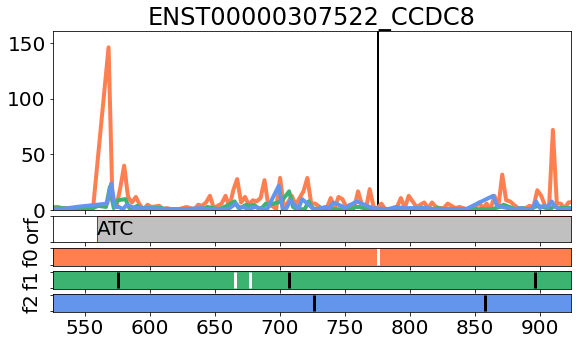

In [27]:
gene = 'CCDC8'

tr_id = 'ENST00000307522'


pred_start = secondary_SET[secondary_SET['tr_id'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = secondary_SET[secondary_SET['tr_id'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 


pre_st = pos_pred_start + '_' + pred_start

xlims = [secondary_SET[secondary_SET['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1, 
         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/TRIPSlike_plots_data_RiboSET/%s_%s_unamb.csv' % (gene, tr_id), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =50, 
                             fraq = 50, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name = 'CCDC8_mccmb.png', font1=20, font2=24)

### Alignment + PCSF per codon 

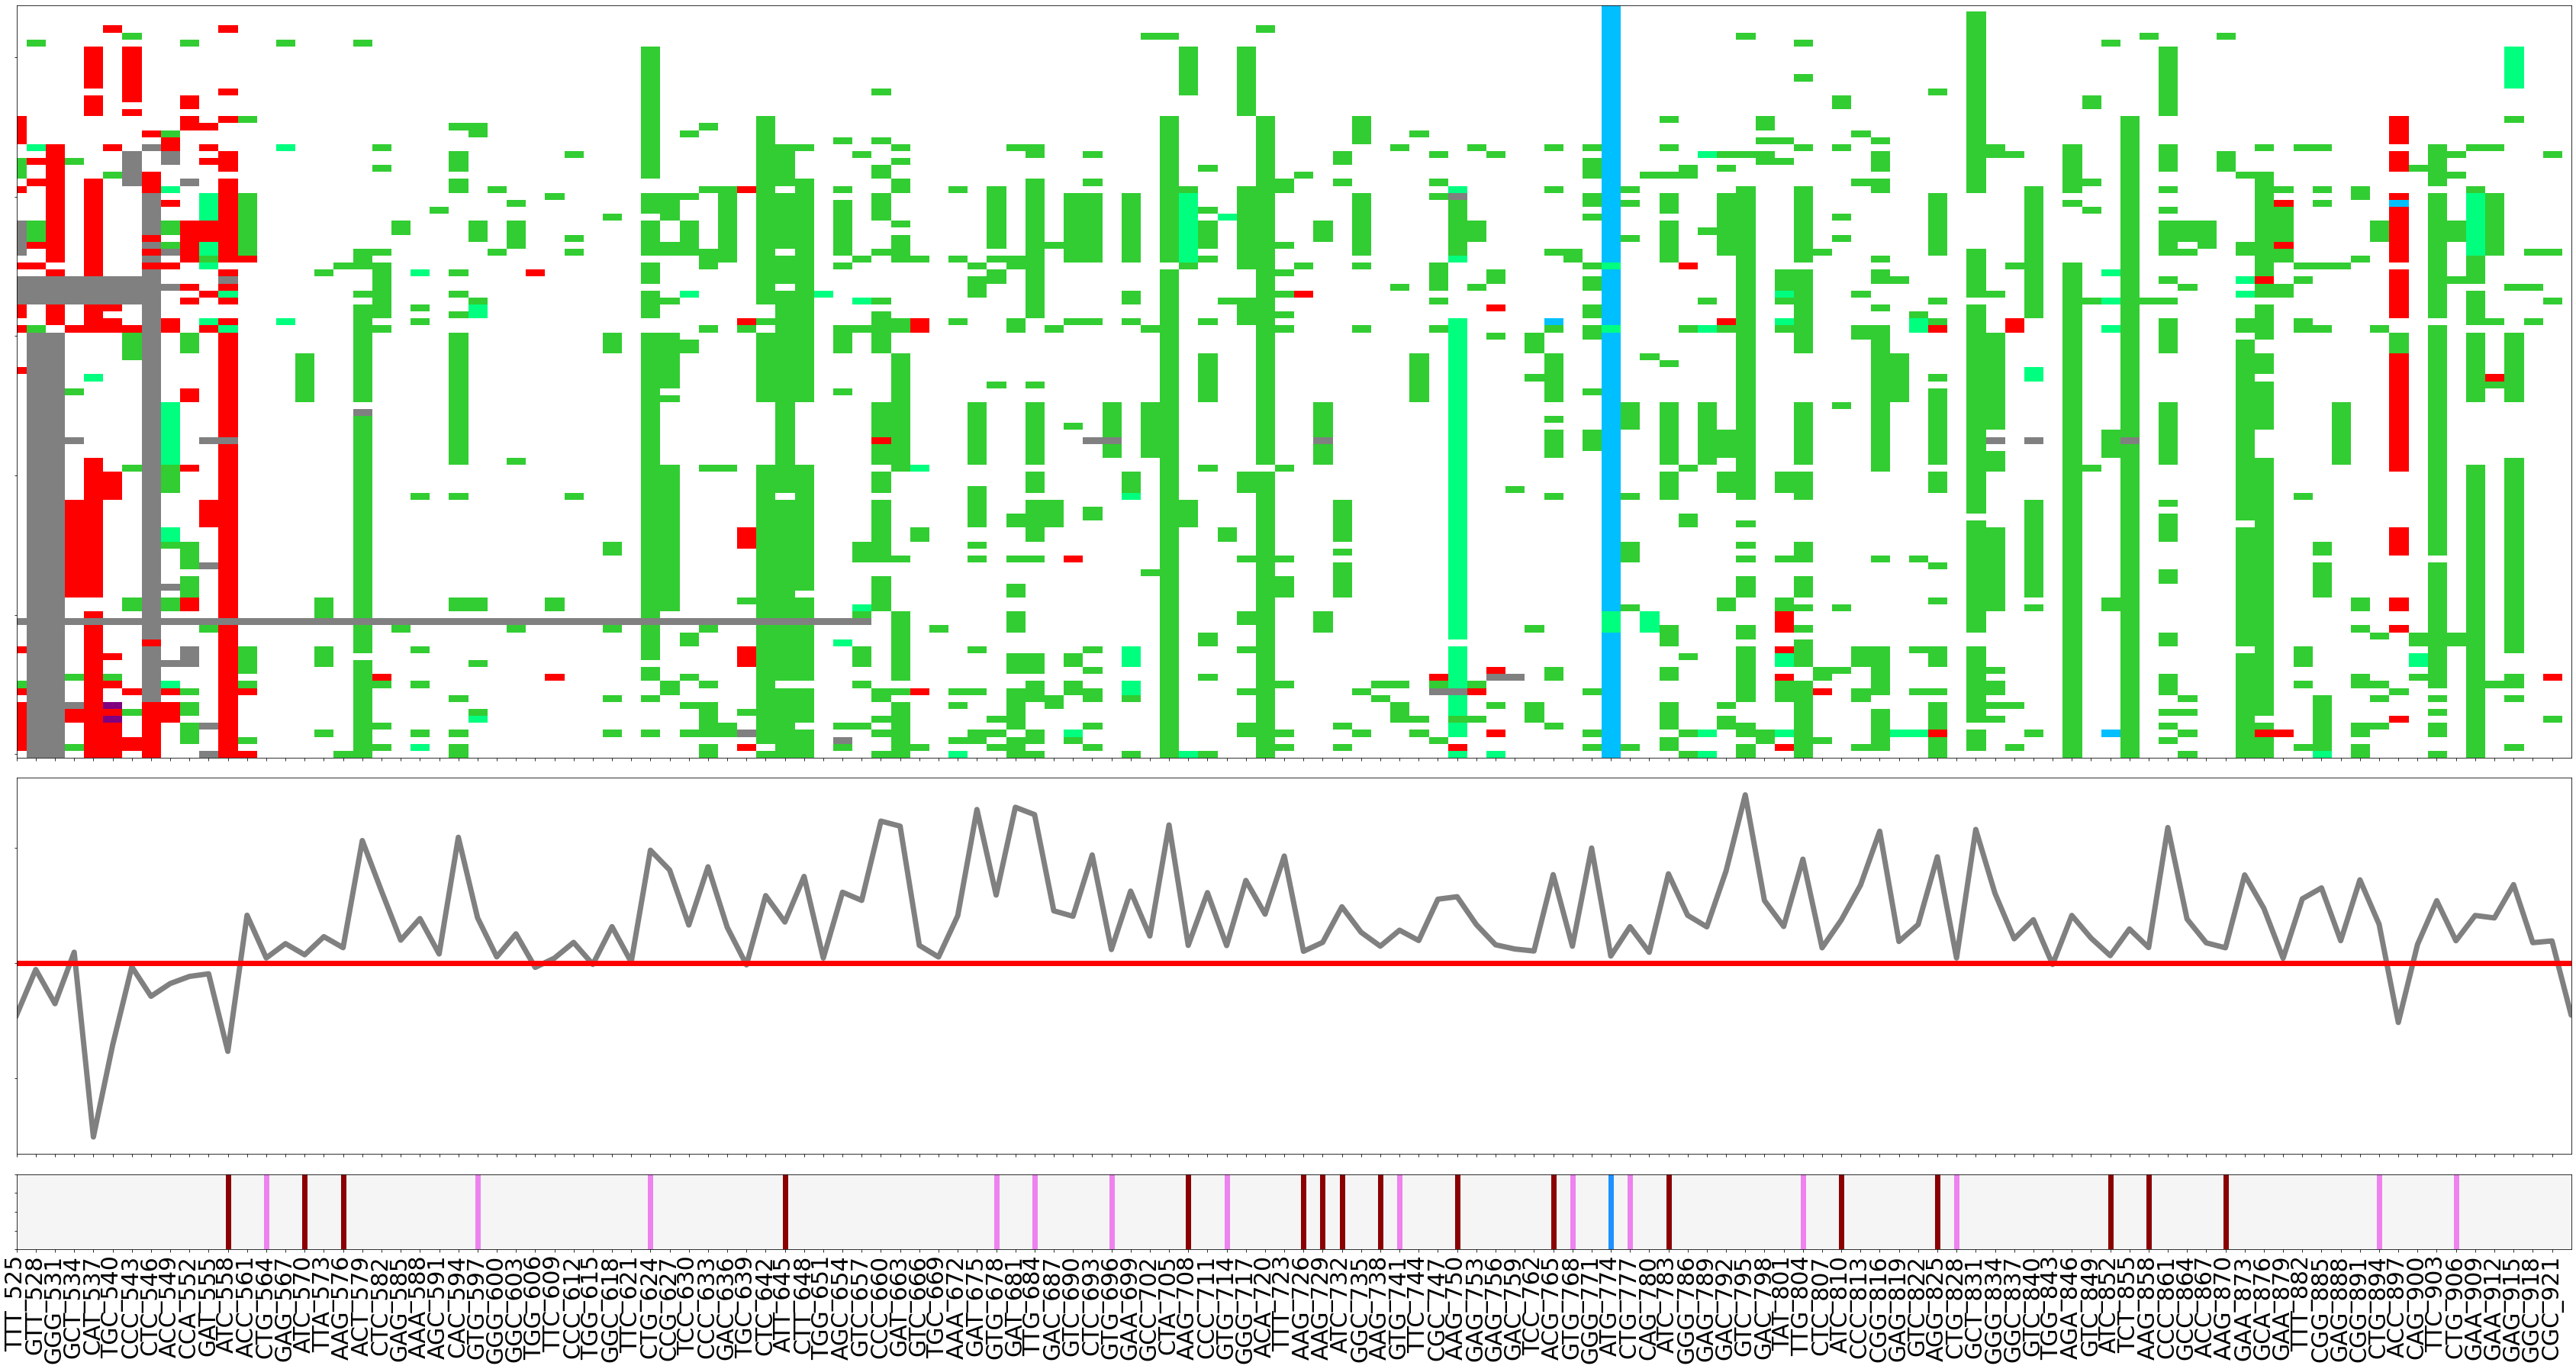

In [28]:
matrix = output_matrix_for_plotting(fasta_input='data/FASTA_aln_NTE_CDS_50codons/CCDC8_primary_and_50codons_CDS.fasta')

d =  prepare_data_for_PCSF_line_plot(tr_id='ENST00000307522.3', 
                                     primary_set=primary_set, 
                                     RES=RES, 
                                     res=res, 
                                     CDS=True)

plot_PCSF_score_and_aln_trips(d = d, 
                              d1=d1,
                        matrix=matrix,
                figsize=(60, 30), 
                X=45, 
                Y=30, 
                add_point=15) # position of predicted by Trips-viz start in codons 

# Figure legends 

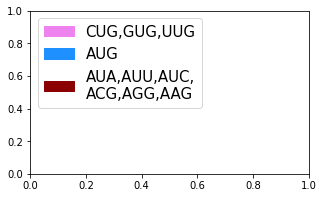

In [32]:
legend_elements = [Patch(facecolor='violet', edgecolor='violet',
                         label='CUG,GUG,UUG'),
                   Patch(facecolor='dodgerblue', edgecolor='dodgerblue',
                         label='AUG'),
                   Patch(facecolor='darkred', edgecolor='darkred',
                         label='AUA,AUU,AUC,\nACG,AGG,AAG')]

# Create the figure
fig, ax = plt.subplots(figsize=(5, 3))
#ax.legend(handles=legend_elements, loc='center')

ax.legend(handles=legend_elements, loc=2, prop={'size': 15})

plt.show()

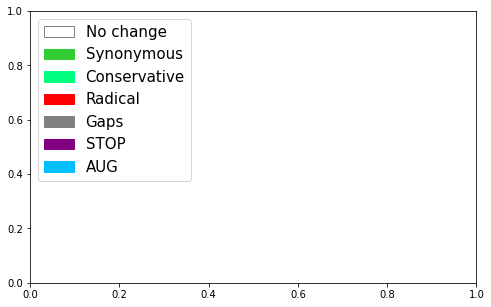

In [31]:
# 'white', 'limegreen', 'grey', 'purple', 'deepskyblue', 'springgreen', 'red'
legend_elements = [Patch(facecolor='white', edgecolor='grey',
                         label='No change'),
                   Patch(facecolor='limegreen', edgecolor='limegreen',
                         label='Synonymous'),
                   Patch(facecolor='springgreen', edgecolor='springgreen',
                         label='Conservative'),
                   Patch(facecolor='red', edgecolor='red',
                         label='Radical'),
                   Patch(facecolor='grey', edgecolor='grey',
                         label='Gaps'),
                   Patch(facecolor='purple', edgecolor='purple',
                         label='STOP'),
                   Patch(facecolor='deepskyblue', edgecolor='deepskyblue',
                        label='AUG')]

# Create the figure
fig, ax = plt.subplots(figsize=(8, 5))
#ax.legend(handles=legend_elements, loc='center')

ax.legend(handles=legend_elements, loc=2, prop={'size': 15})

plt.show()

# Other examples 

In [23]:
set(primary_set.gene.unique()).intersection(secondary_SET.gene.tolist())

{'CCDC8', 'CYTH2', 'FXR2', 'H1FX', 'HNRNPA0', 'MARCKS', 'RPTOR', 'SFPQ'}

# CYTH2

In [24]:
meta[meta['gene'] == 'CYTH2'][['gene', 'tr_id', 'Riboseq_Summary', 'PhyloCSF120score']]

,gene,tr_id,Riboseq_Summary,PhyloCSF120score
68944,CYTH2,ENST00000452733.6,GTG; 369-477; Rank: 255; cov: 74.19,95.5282
68945,CYTH2,ENST00000427476.4,NaN,95.5282
68946,CYTH2,ENST00000391881.7,NaN,95.5282
68947,CYTH2,ENST00000325139.9,NaN,-160.5772
68948,CYTH2,ENST00000620214.1,NaN,-0.0926


In [25]:
pre_st, xlims

('559_ATC', [525, 924])

811
0


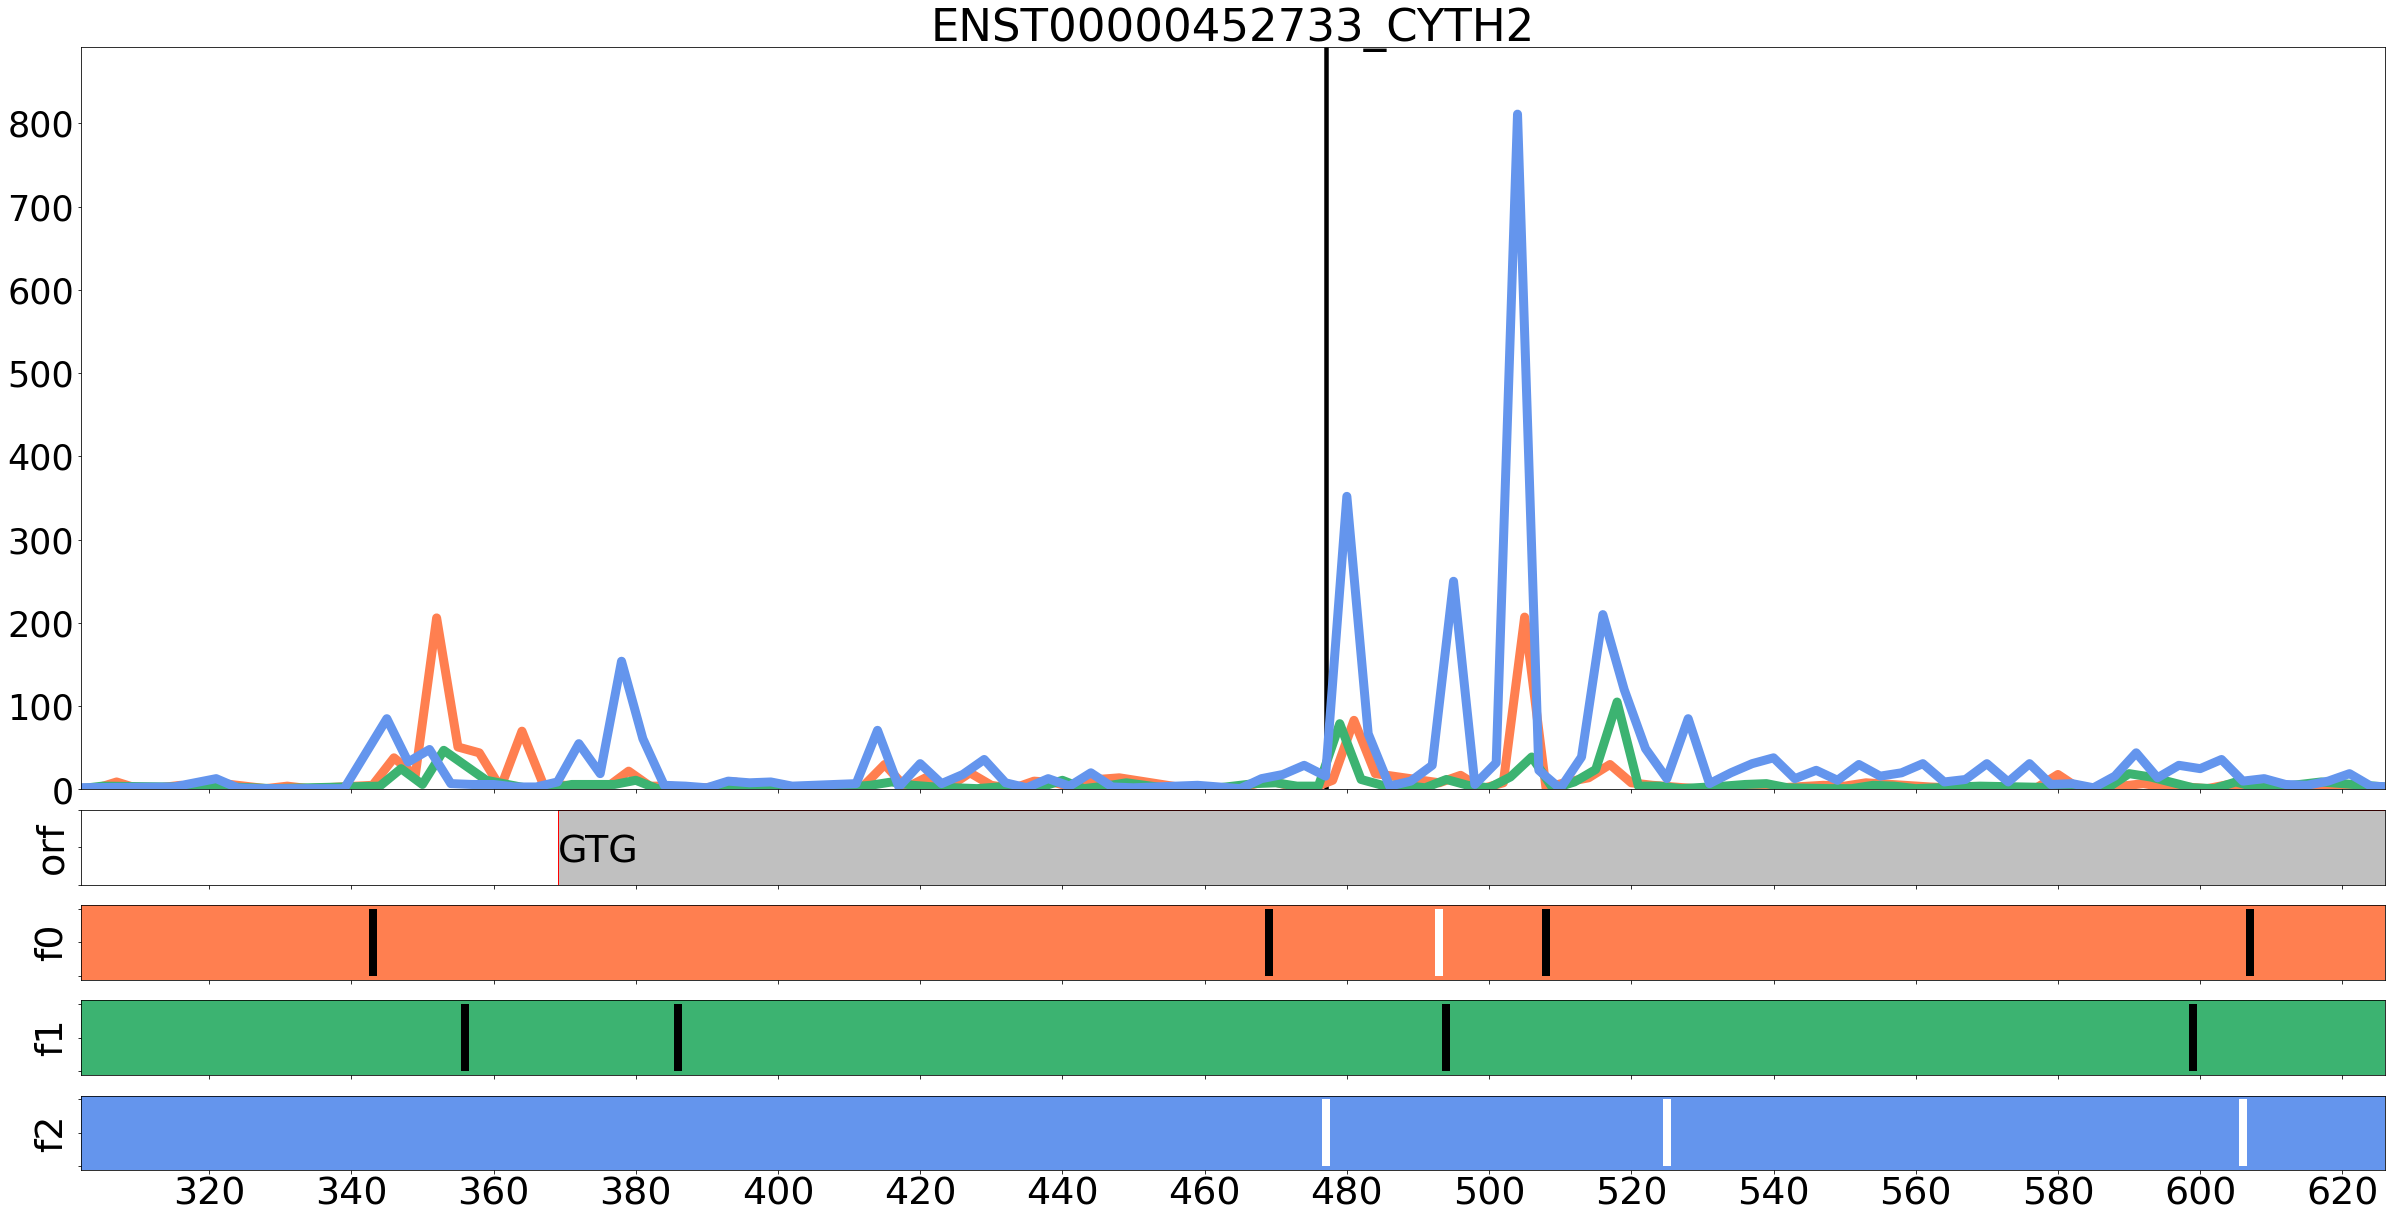

In [26]:
gene = 'CYTH2'

tr_id = 'ENST00000452733'


pred_start = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 

pre_st = pos_pred_start + '_' + pred_start

xlims = [meta[meta['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1, 
         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/TRIPSlike_plots_data_RiboSET/%s_%s_unamb.csv' % (gene, tr_id), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =100, 
                             fraq = 20, 
                             cds = False,
                           figsize=(40, 20),
                           xlims=xlims,
                            zeros=False)

trips_full2(d1)

In [27]:
NTE_start = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1
cds_plus50 = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos + 50*3

print (meta[meta['tr_id'].str.contains(tr_id)].iloc[0].tr_id, NTE_start, cds_plus50)

# Rscript: chr19:48469334-48469526+chr19:48470353-48470483, strand +
# get fasta from CodAlignView = faster than go to the server 

ENST00000452733.6 302 626


In [28]:
(int(pos_pred_start) - int(NTE_start)) // 3

22

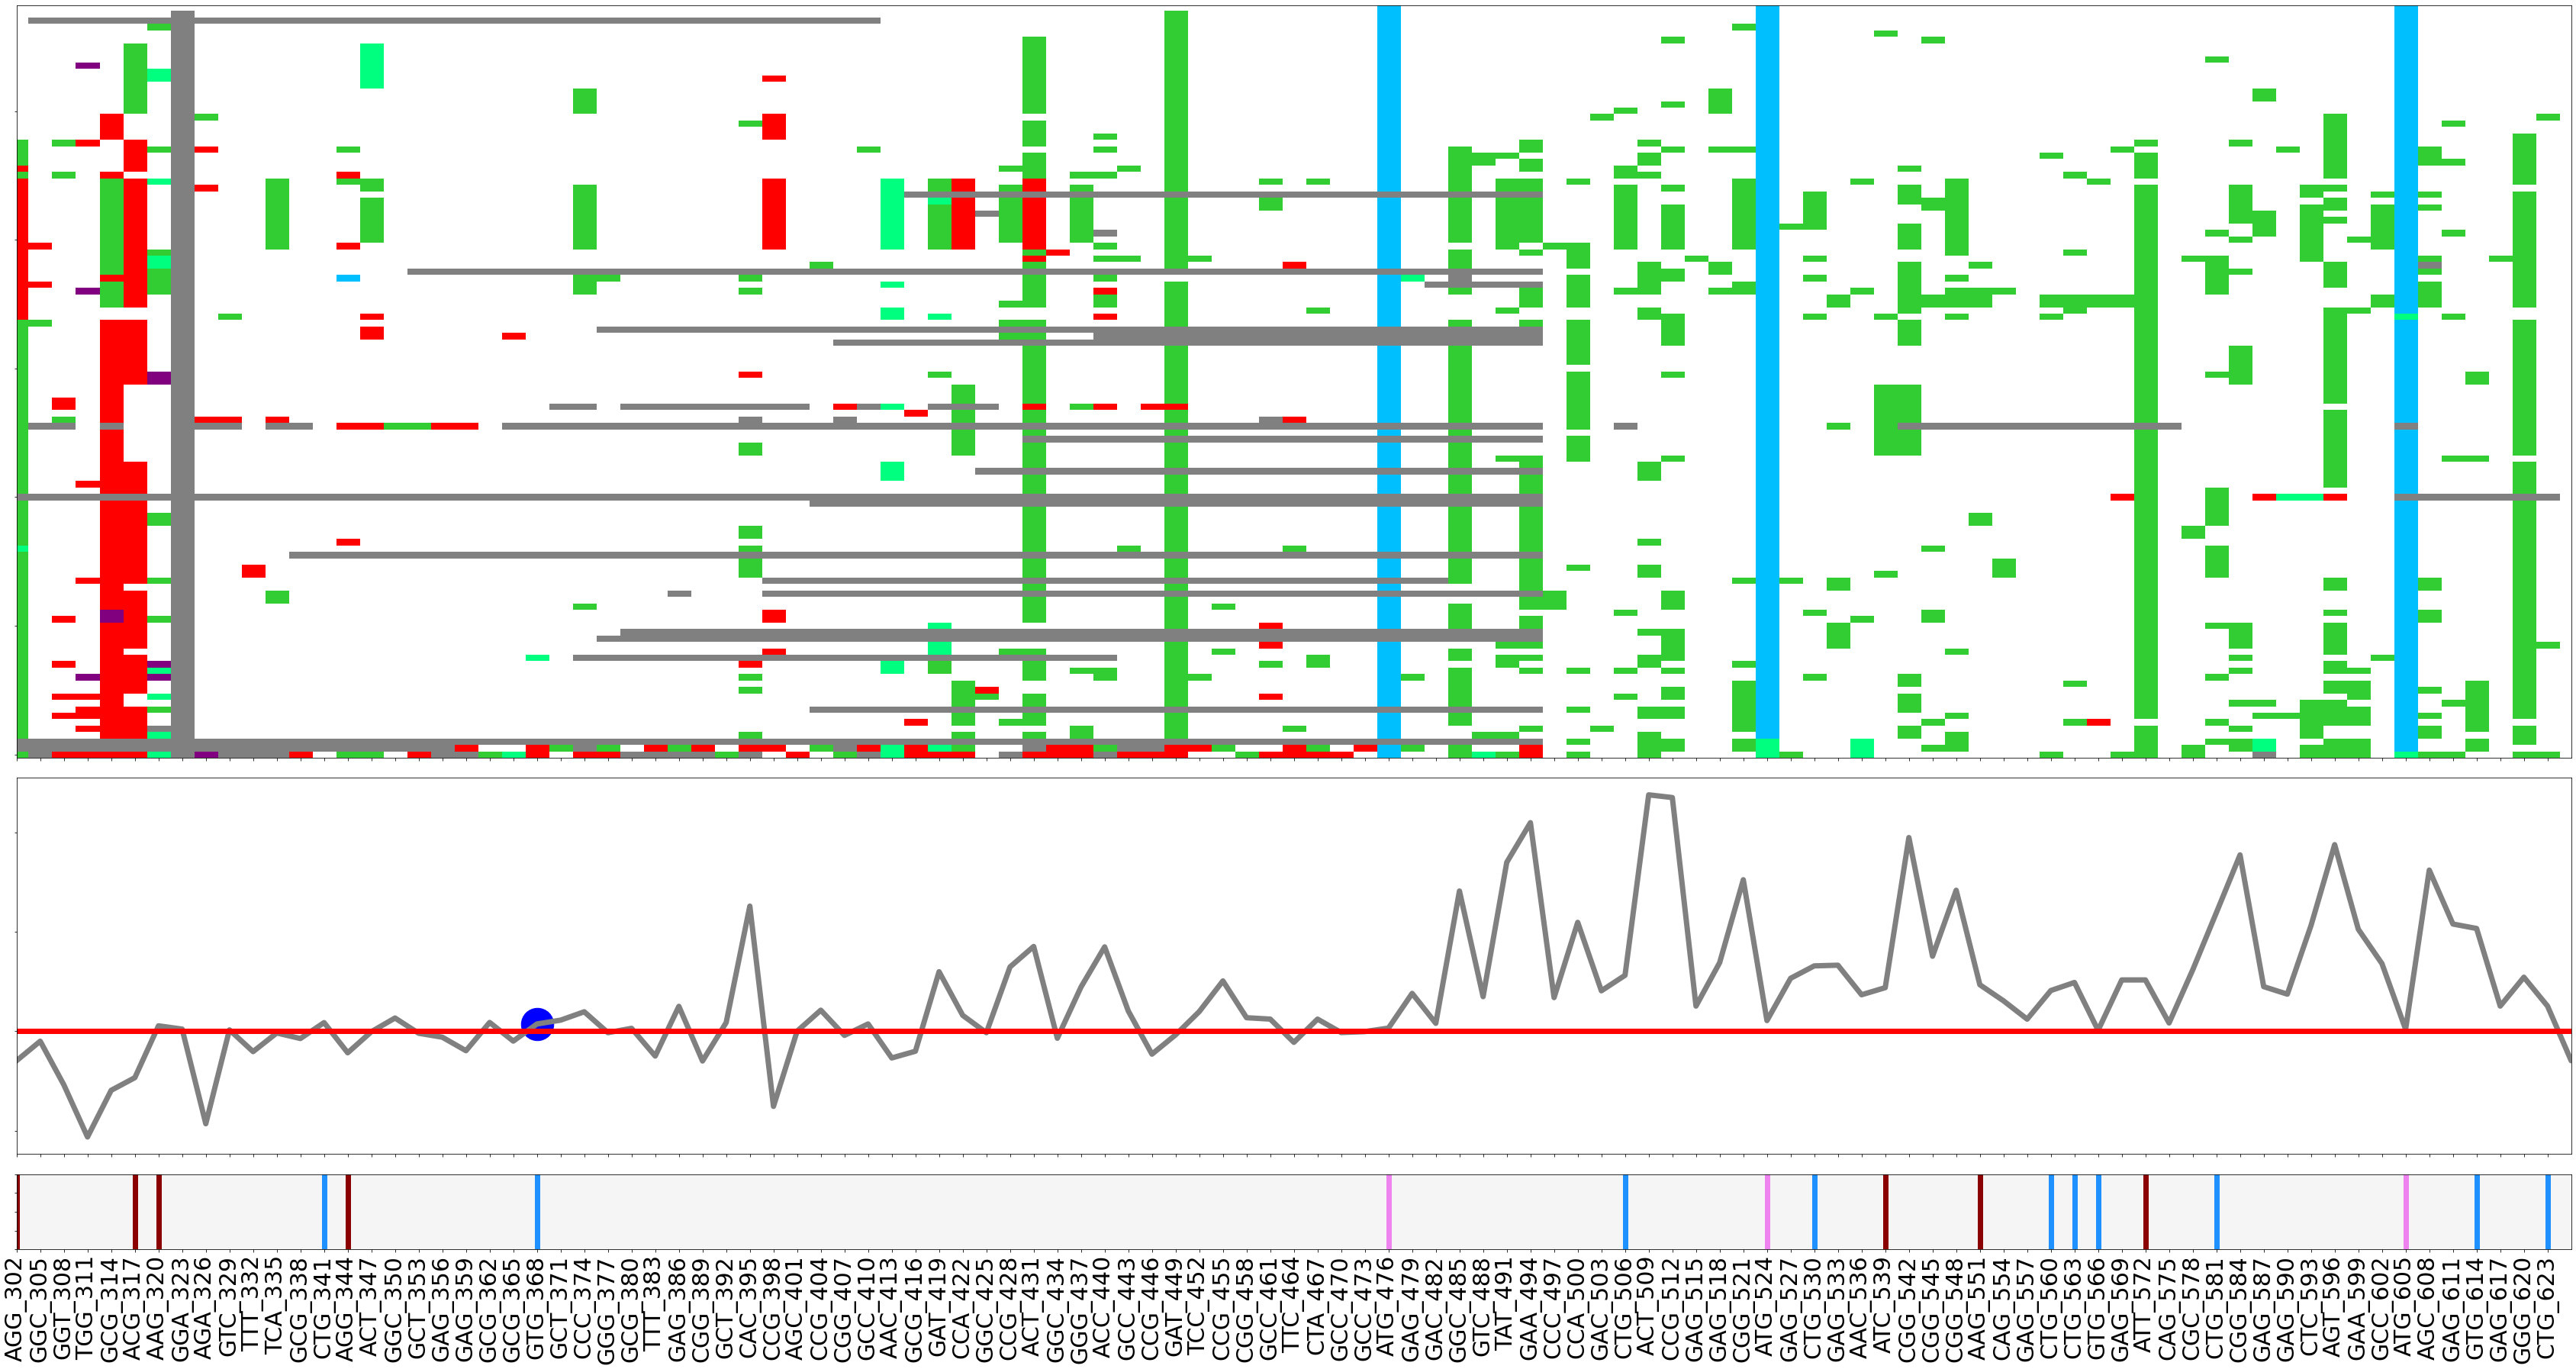

In [29]:
matrix = output_matrix_for_plotting(fasta_input='data/FASTA_aln_NTE_CDS_50codons/%s_primary_and_50codons_CDS.fasta' % gene)

d =  prepare_data_for_PCSF_line_plot(tr_id='ENST00000452733.6', 
                                     primary_set=primary_set, 
                                     RES=RES, 
                                     res=res, 
                                     CDS=True)

plot_PCSF_score_and_aln_trips(d = d, 
                              d1=d1,
                        matrix=matrix,
                figsize=(60, 30), 
                X=45, 
                Y=30, 
                add_point=22) # position of predicted by Trips-viz start in codons 

# FXR2

In [30]:
meta[meta['gene'] == 'FXR2'].iloc[0].tr_id

'ENST00000250113.11'

In [31]:
FXR2,ENST00000250113.11

SyntaxError: invalid syntax (<ipython-input-31-018f8dfab12e>, line 1)

In [ ]:
gene = 'FXR2'

tr_id = 'ENST00000250113'


pred_start = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 

pre_st = pos_pred_start + '_' + pred_start

xlims = [meta[meta['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1, 
         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/TRIPSlike_plots_data_RiboSET/%s_%s_unamb.csv' % (gene, tr_id), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =100, 
                             fraq = 20, 
                             cds = False,
                           figsize=(40, 20),
                           xlims=xlims,
                            zeros=False)

trips_full2(d1)

In [ ]:
pre_st, meta[meta['gene'] == 'FXR2'].iloc[0].N_term_start

In [ ]:
(117)

In [ ]:
matrix = output_matrix_for_plotting(fasta_input='data/FASTA_aln_NTE_CDS_50codons/%s_primary_and_50codons_CDS.fasta' % gene)

d =  prepare_data_for_PCSF_line_plot(tr_id='ENST00000250113.11', 
                                     primary_set=primary_set, 
                                     RES=RES, 
                                     res=res, 
                                     CDS=True)

plot_PCSF_score_and_aln_trips(d = d, 
                              d1=d1,
                        matrix=matrix,
                figsize=(60, 30), 
                X=45, 
                Y=30, 
                add_point=39) # position of predicted by Trips-viz start in codons 

In [ ]:
set(primary_set.gene.tolist()).intersection(secondary_SET.gene.tolist())

# SFPQ

In [ ]:
SFPQ,ENST00000357214.5 

In [59]:
meta[meta['gene'] == 'SFPQ'].iloc[0].tr_id

'ENST00000357214.5'

12339
0


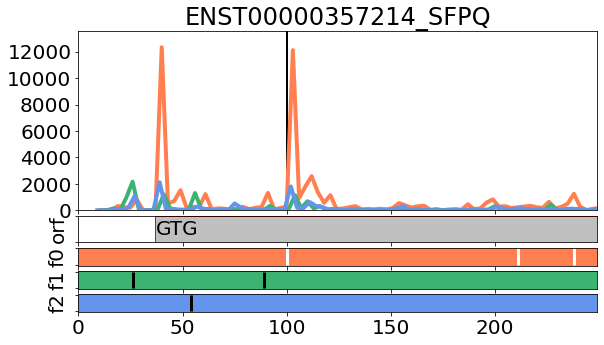

In [33]:
gene = 'SFPQ'

tr_id = 'ENST00000357214'


pred_start = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split(';')[0]
pos_pred_start = meta[meta['tr_id'].str.contains(tr_id)].iloc[0].Riboseq_Summary.split('; ')[1].split('-')[0] 

pre_st = pos_pred_start + '_' + pred_start

xlims = [meta[meta['tr_id'].str.contains(tr_id)].iloc[0].N_term_start1, 
         metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos+50*3]

d1 = prepare_data_for_trips2(meta = meta, 
                           file_counts = 'data/TRIPSlike_plots_data_RiboSET/%s_%s_unamb.csv' % (gene, tr_id), 
                           metadata_pc_g25 = metadata_pc_g25, 
                           tr_id = tr_id, 
                             gene = gene, 
                            predicted_ext_start=pre_st, 
                            l=10, 
                            p =2000, 
                             fraq = 50, 
                             cds = False,
                           figsize=(9, 5),
                             linew = 4, 
                           xlims=xlims,
                            zeros=False)

trips_full2(d1, name='SFPQ', font1=20, font2=24)

In [34]:
pre_st

'37_GTG'

In [35]:
37/3

12.333333333333334

In [36]:
meta[meta['tr_id'] == 'ENST00000357214.5']

# 0 
# 99+50*3

,tr_id,N_term_start,N_term_end,len,N_term_start1,N_term_end1,len_codons,gene,50len_flag,global_coo_50_and_less,...,gene_ext,Start_ext,Stop_ext,global_rank_ext,Start_codon_ext,Proteomics_count_ext,Coverage_value_ext,CDS_ratio,Riboseq_Summary,Nstart_Nend
1558,ENST00000357214.5,0,99,99,0,99,33.0,SFPQ,0,chr1:35193050-35193148,...,SFPQ,37.0,100.0,9.0,GTG,11.538462,81.25,0.59,GTG; 37-100; Rank: 9; cov: 81.25,0-99


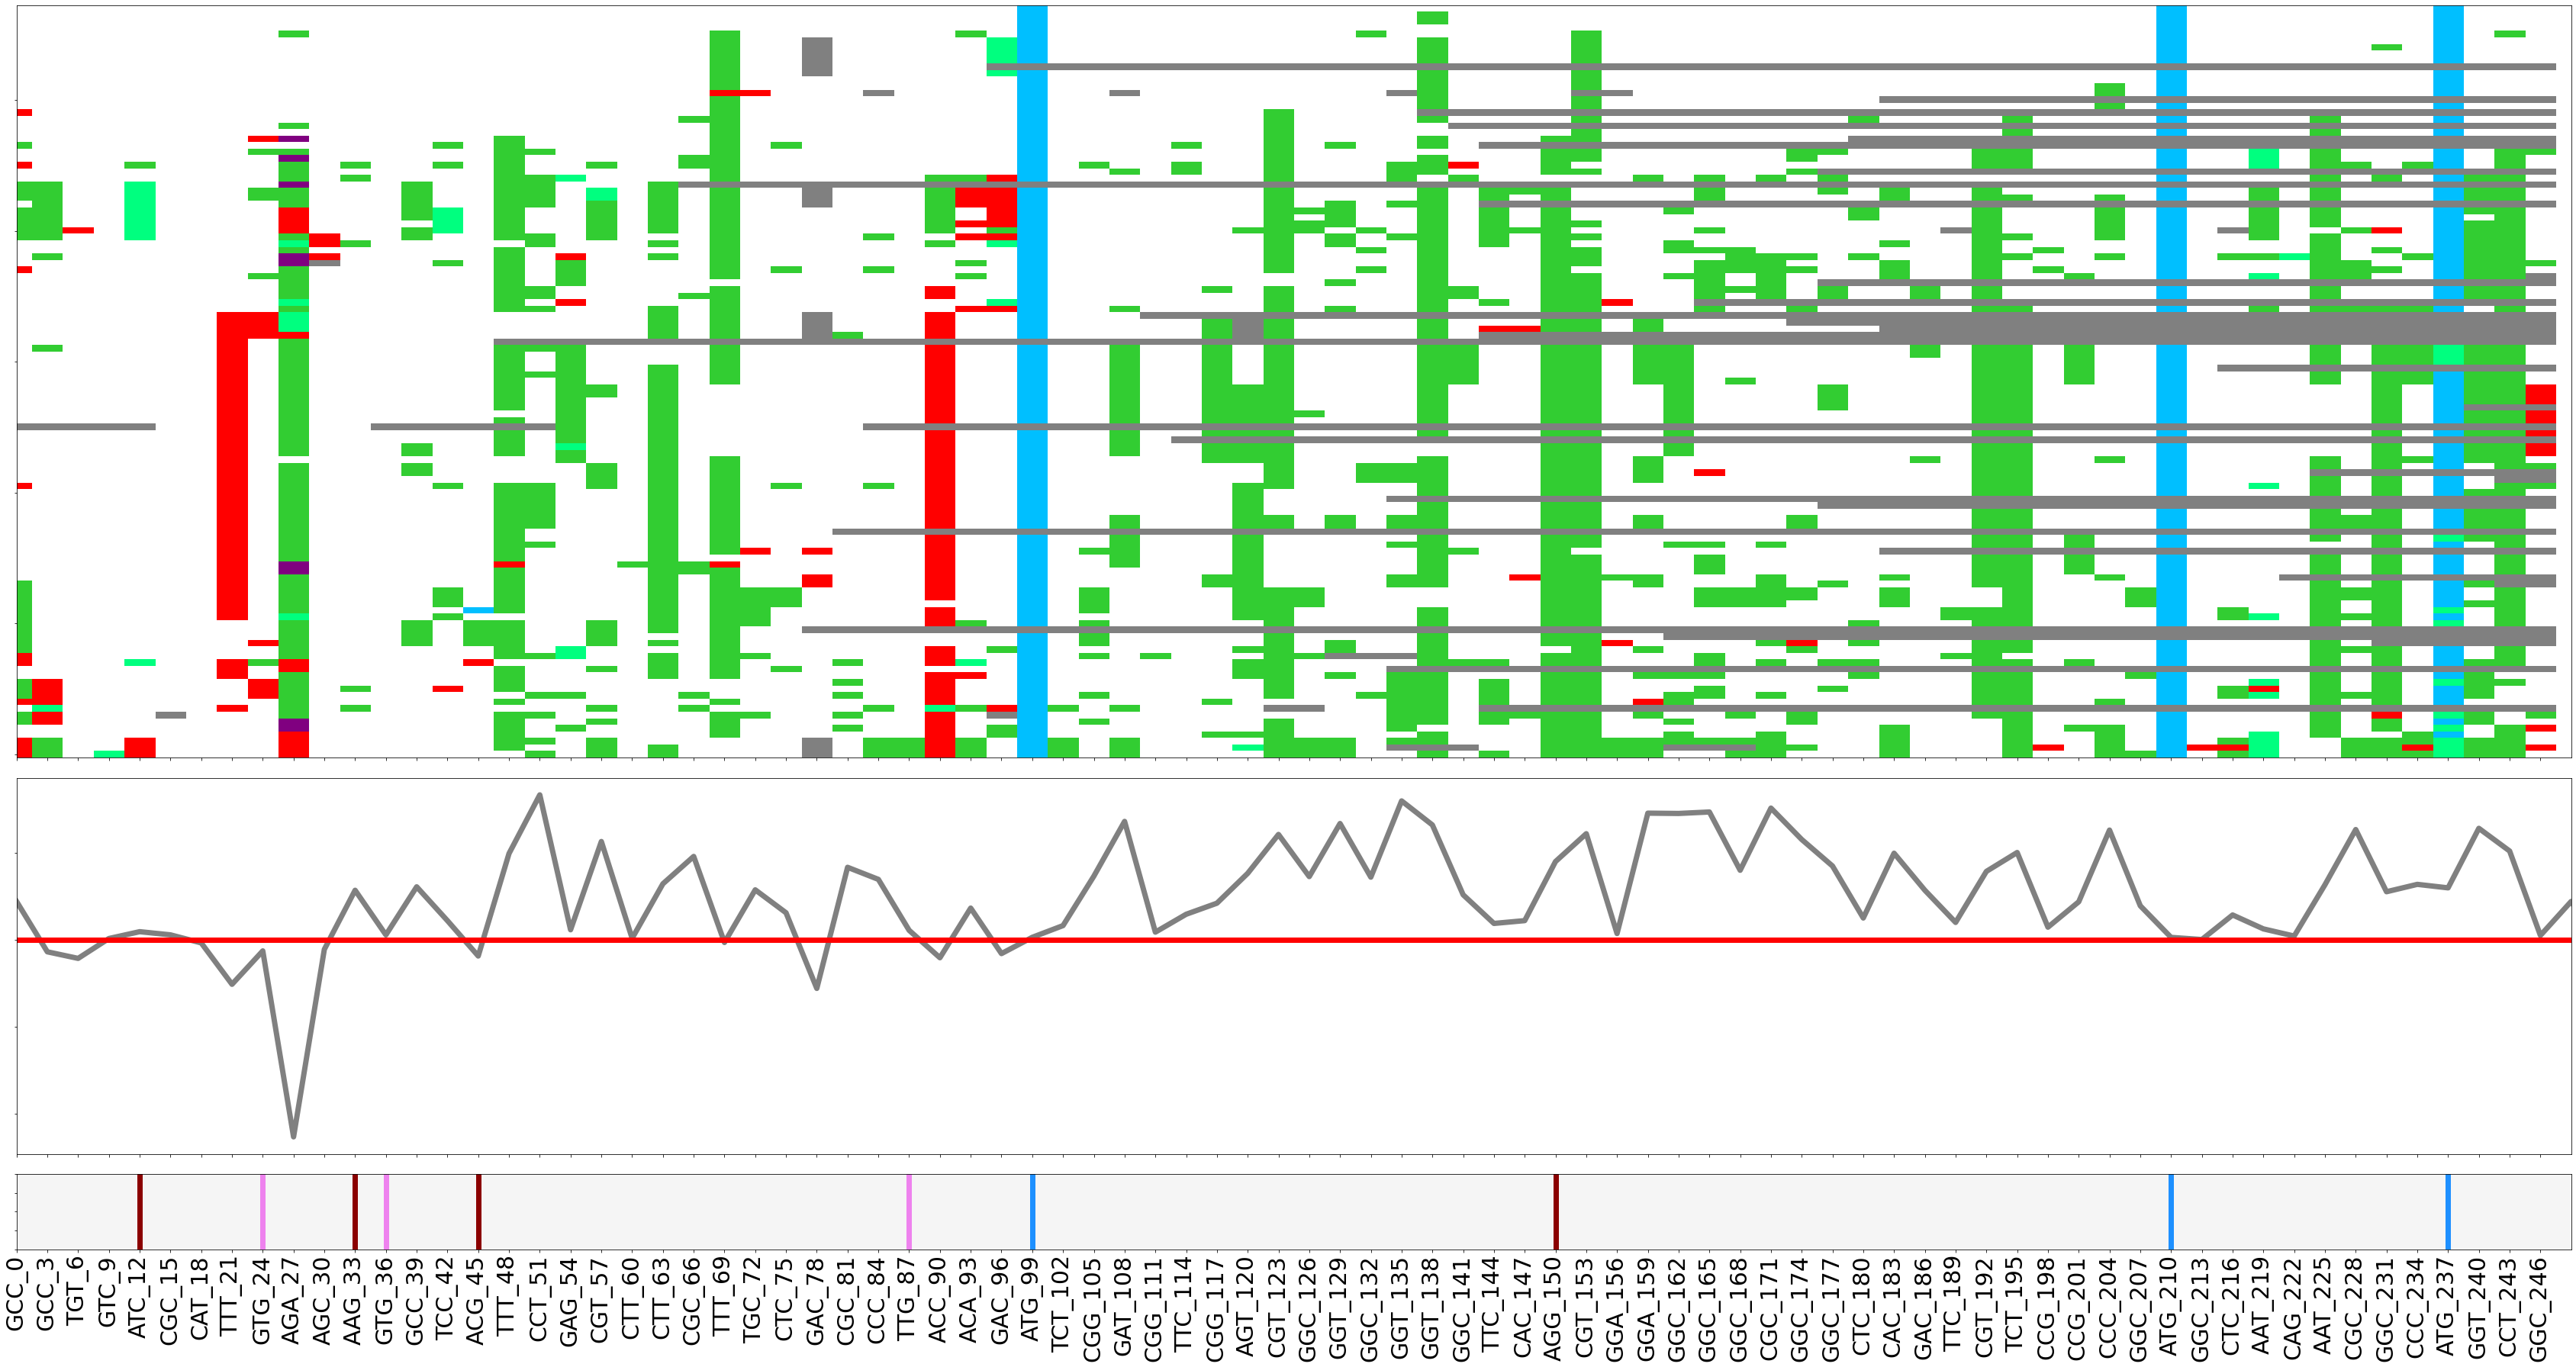

In [37]:
matrix = output_matrix_for_plotting(fasta_input='data/FASTA_aln_NTE_CDS_50codons/%s_primary_and_50codons_CDS.fasta' % gene)

d =  prepare_data_for_PCSF_line_plot(tr_id='ENST00000357214.5', 
                                     primary_set=secondary_SET, 
                                     RES=RES, 
                                     res=res, 
                                     CDS=True)

plot_PCSF_score_and_aln_trips(d = d, 
                              d1=d1,
                        matrix=matrix,
                figsize=(60, 30), 
                X=45, 
                Y=30, 
                add_point=12) # position of predicted by Trips-viz start in codons 

In [ ]:
RES[RES['tr_id'] == 'ENST00000285605.7']